# Final project submission

COMP 4304 / 6934 \
Victor Ukpe & Riya Shah \
Apr 10, 2023

Data set: flights.csv

## Customer's main goal

* ### Find out where efforts should be focused on to improve the safety of the Canadian air space

## Current submissions


* ### Show four final visulizations
* ### Show the code used to produce the four visualizations


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
%matplotlib inline

## Importing data

In [2]:
df = pd.read_csv('flights.csv')
df.head()

,id,date,airport_code,airport_name,airport_province,location,region,latitude,longitude,incident_type,...,aircraft_type,aircraft_model,aircraft_make,organization,operator_type,operation_type,destination_airport_code,destination_airport_name,departure_airport_code,departure_airport_name
0,156615,2022-12-10 14:06:00,YUL,Pierre Elliott Trudeau Intl,QUEBEC,Montreal,QUEBEC,45.470556,73.740833,SMOKE OR FIRE (iii),...,AEROPLANE,737-200,BOEING,AIR INUIT,COMMERCIAL,AIR TRANSPORT,YPX,PUVIRNITUQ,YUL,Pierre Elliott Trudeau Intl
1,156604,2022-11-07 19:20:00,YGP,Gaspé (Michel-Pouliot),QUEBEC,GASPÉ,QUEBEC,48.775278,64.479722,EMERGENCY/PRIORITY (xi),...,AEROPLANE,BA 32-12,BRITISH AEROSPACE,PASCAN AVIATION,COMMERCIAL,AIR TRANSPORT,YGR,ÎLES-DE-LA-MADELEINE,YGP,Gaspé (Michel-Pouliot)
2,156603,2022-11-07 18:51:00,YMT,CHIBOUGAMAU/CHAPAIS,QUEBEC,CHIBOUGAMAU,QUEBEC,49.771944,74.528056,EMERGENCY/PRIORITY (xi),...,AEROPLANE,A100,BEECH,PROPAIR,COMMERCIAL,AIR TRANSPORT,YGL,LA GRANDE RIVIÈRE,YVP,KUUJJUAQ
3,156599,2022-12-04 19:15:00,SU3,St-Hyacinthe,QUEBEC,St-Hyacinthe,QUEBEC,45.606667,73.015000,ENGINE (i),...,AEROPLANE,DA42,DIAMOND,CARGAIR - CARGAIR,COMMERCIAL,TRAINING,YHU,St-Hubert,YSC,SHERBROOKE
4,156593,2022-12-04 12:20:00,NF4,(Lindsay),ONTARIO,Kawartha Lakes,ONTARIO,44.364722,78.783889,PILOT ERROR / WEATHER / MECHANICAL,...,AEROPLANE,172I,CESSNA,DURHAM FLIGHT CENTRE,PRIVATE,PLEASURE/TRAVEL,NF4,(Lindsay),YOO,Oshawa Executive


In [3]:
commercial_df = df[df['operator_type'] == "COMMERCIAL"]
de_havilland_planes = commercial_df[commercial_df['aircraft_make'] == "DE HAVILLAND"]
de_havilland_planes['aircraft_model_group'] = de_havilland_planes.aircraft_model.str[:5]

/var/folders/_c/nn1r19ts4hg1y2lgh_gvprqr0000gq/T/ipykernel_3521/1733430531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_havilland_planes['aircraft_model_group'] = de_havilland_planes.aircraft_model.str[:5]


## Figure 1 

/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


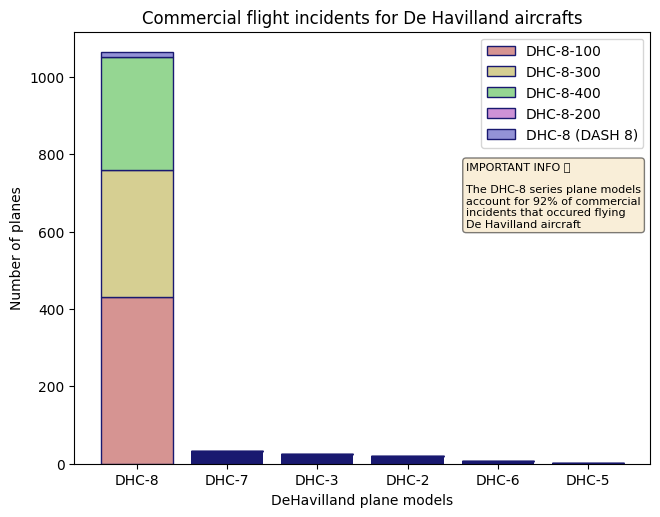

In [4]:
#plotting the bar graph
fig = plt.figure()    

#get the list of De havilland plane model groups
model_group = de_havilland_planes.aircraft_model_group.unique()

#getting df for base plot for graph
dhc8_planes = de_havilland_planes[de_havilland_planes['aircraft_model_group'] == "DHC-8"]

#getting df for every plane model group
y_dhc7 = len(de_havilland_planes[de_havilland_planes['aircraft_model_group']=="DHC-7"])
y_dhc3 = len(de_havilland_planes[de_havilland_planes['aircraft_model_group']=="DHC-3"])
y_dhc2 = len(de_havilland_planes[de_havilland_planes['aircraft_model_group']=="DHC-2"])
y_dhc6 = len(de_havilland_planes[de_havilland_planes['aircraft_model_group']=="DHC-6"])
y_dhc5 = len(de_havilland_planes[de_havilland_planes['aircraft_model_group']=="DHC-5"])

y1 = np.array([0, y_dhc7, y_dhc6, y_dhc2, y_dhc3, y_dhc5])
y2 = np.array([len(dhc8_planes[dhc8_planes['aircraft_model']=="DHC-8-100"]), 0, 0, 0, 0, 0])
y3 = np.array([len(dhc8_planes[dhc8_planes['aircraft_model']=="DHC-8-300"]), 0, 0, 0, 0, 0])
y4 = np.array([len(dhc8_planes[dhc8_planes['aircraft_model']=="DHC-8-400"]), 0, 0, 0, 0, 0])
#y5 = np.array([len(dhc8_planes[dhc8_planes['aircraft_model']=="DHC-8-200"]), 0, 0, 0, 0, 0]) -- DHC-8-200 has no planes
y6 = np.array([len(dhc8_planes[dhc8_planes['aircraft_model']=="DHC-8 (DASH 8)"]), 0, 0, 0, 0, 0])

#setting plot axes
axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # main axes

#plotting bars
axes1.bar(model_group, y1, color='midnightblue')
axes1.bar(model_group, y2, bottom=y1, color='#d69492', edgecolor='midnightblue')
axes1.bar(model_group, y3, bottom=y1+y2, color='#d6cf92', edgecolor='midnightblue')
axes1.bar(model_group, y4, bottom=y1+y2+y3, color='#95d692', edgecolor='midnightblue')
#axes1.bar(model_group, y5, bottom=y1+y2+y3+y4, color='lightgray') -- DHC-8-200 has no incidents
axes1.bar(model_group, y6, bottom=y1+y2+y3+y4, color='#9392d6', edgecolor='midnightblue')

textstr = '\n'.join(("IMPORTANT INFO \U0001F4A1", "", "The DHC-8 series plane models", "account for 92% of commercial", "incidents that occured flying ", "De Havilland aircraft"))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axes1.text(0.68, 0.7, textstr, transform=axes1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)


custom_patch = [Patch(facecolor='#d69492', edgecolor='midnightblue',label='DHC-8-100'), 
                Patch(facecolor='#d6cf92', edgecolor='midnightblue',label='DHC-8-300'),
                Patch(facecolor='#95d692', edgecolor='midnightblue',label='DHC-8-400'),
                Patch(facecolor='#cd92d6', edgecolor='midnightblue',label='DHC-8-200'), 
                Patch(facecolor='#9392d6', edgecolor='midnightblue',label='DHC-8 (DASH 8)')]
                
axes1.legend(custom_patch, ['DHC-8-100', 'DHC-8-300', 'DHC-8-400', 'DHC-8-200', 'DHC-8 (DASH 8)'])


axes1.set_xlabel('DeHavilland plane models')
axes1.set_ylabel('Number of planes')
axes1.set_title('Commercial flight incidents for De Havilland aircrafts')



myexplode = [0, 0, 0, 0.8, 0.8]




## Figure 2

In [5]:
model = dhc8_planes.aircraft_model.unique()
def f(models):
    axes2 = fig.add_axes([0.5, 0.5, 0.4, 0.4]) # inset axes
    axes2.clear()
    axes2.set_title(models)
    pie_df = dhc8_planes.loc[dhc8_planes['aircraft_model'] == models]
    pie_dfs = pie_df[pie_df['incident_type'] != "EMERGENCY/PRIORITY (xi)"]
    pie_label = pie_dfs.incident_type.unique()

    explode = [0.05 for x in range(pie_dfs.incident_type.nunique())]

    axes2.set_title(models)
    plt.pie(pie_dfs['incident_type'].value_counts(sort=True), labels=pie_label, explode=explode, autopct='%1.1f%%', shadow=True)
    plt.title("Fractions of non-emergency incidents type for the "+models+" model planes", fontsize=15, fontweight=0, color='black', loc='left', style='oblique')
 
widgets.interact(f, models=model, description='select:');

interactive(children=(Dropdown(description='models', options=('DHC-8-300', 'DHC-8-400', 'DHC-8 (DASH 8)', 'DHC…

## Figure 3

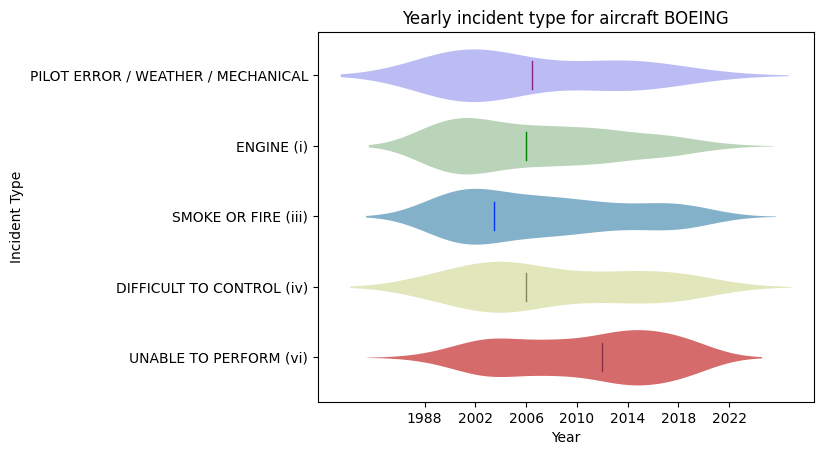

In [6]:
# Convert 'date' column to DateTime Object Convert series to date time series
df['date'] = pd.to_datetime(df['date'])
df['date']

# Extracting year from the date time object
df['Year'] = df['date'].dt.year
df.head(5)

df1 = df[df['aircraft_make'] == "BOEING"]
incident_type_list = ["PILOT ERROR / WEATHER / MECHANICAL", "ENGINE (i)", "SMOKE OR FIRE (iii)", "DIFFICULT TO CONTROL (iv)", "UNABLE TO PERFORM (vi)"]
years = list(range(1998, 2022))
filtered_df = df1[(df1['incident_type'].isin(incident_type_list)) & (df1['Year'].isin(years))].drop_duplicates(subset='id')
colors = {'PILOT ERROR / WEATHER / MECHANICAL': '#b3b3fe', 'ENGINE (i)': '#b4d9b3', 'SMOKE OR FIRE (iii)': '#78b4d6', 'DIFFICULT TO CONTROL (iv)': '#e7edb4', 'UNABLE TO PERFORM (vi)': '#e65a5a' }

median_line = {'PILOT ERROR / WEATHER / MECHANICAL': '#872587', 'ENGINE (i)': '#018000', 'SMOKE OR FIRE (iii)': '#0433ff', 'DIFFICULT TO CONTROL (iv)': '#848764', 'UNABLE TO PERFORM (vi)': '#8c3446' }
palette = [median_line[incident_type] for incident_type in incident_type_list]

ax = sns.violinplot(data=filtered_df, x='Year', y='incident_type', inner='stick', 
                    order=['PILOT ERROR / WEATHER / MECHANICAL', 'ENGINE (i)', 'SMOKE OR FIRE (iii)', 'DIFFICULT TO CONTROL (iv)', 'UNABLE TO PERFORM (vi)'], 
                    alpha=0.5, facecolor='w', edgecolor='gray', linewidth=0, palette=colors, whis=0.1)
medians = filtered_df.groupby('incident_type')['Year'].median()
for i in range(len(medians)):
    ax.plot([medians[i], medians[i]], [-0.2 + i, 0.2 + i], color=palette[i], linewidth=1)

new_xticks = [1998, 2002, 2006, 2010, 2014, 2018, 2022]
new_xticklabels = ['1988', '2002', '2006', '2010', '2014', '2018', '2022']

ax.set_xticks(new_xticks)
ax.set_xticklabels(new_xticklabels)

plt.title('Yearly incident type for aircraft BOEING')
plt.xlabel('Year')
plt.ylabel('Incident Type')

plt.show()

## Figure 4

In [7]:
%matplotlib notebook

incident_type_list = ["PILOT ERROR / WEATHER / MECHANICAL", "ENGINE (i)", "SMOKE OR FIRE (iii)", "DIFFICULT TO CONTROL (iv)", "UNABLE TO PERFORM (vi)"]
region_list = ["ATLANTIC", "CENTRAL", "FOREIGN", "ONTARIO", "PACIFIC", "QUEBEC", "WESTERN"]

commercial_df = df[(df['operator_type'] == "COMMERCIAL") & (df['incident_type'] != "EMERGENCY/PRIORITY (xi)")]

df2 = commercial_df[['region', 'incident_type']]

df_grouped = df2.groupby(['region', 'incident_type']).size().reset_index()
# Create a pivot table

table = pd.pivot_table(df_grouped, index=['region'], columns=['incident_type'])
# Delete columns with Nan values and convert to integers
table = table.dropna(axis=1).astype(int)
table

0             \
incident_type DEPRESSURIZATION (vii) ENGINE (i)   
region                                            
ATLANTIC                           6         79   
CENTRAL                           28        196   
FOREIGN                            2          1   
ONTARIO                           27        206   
PACIFIC                           17        163   
QUEBEC                            22        189   
WESTERN                           24        328   

                                                                         
incident_type PILOT ERROR / WEATHER / MECHANICAL UNABLE TO PERFORM (vi)  
region                                                                   
ATLANTIC                                      61                     16  
CENTRAL                                      190                     33  
FOREIGN                                        1                      1  
ONTARIO                                      162                    110  
PACIFIC                                      132                     38  
QUEBEC                                       183                     23  
WESTERN                                      176                     99

<IPython.core.display.Javascript object>


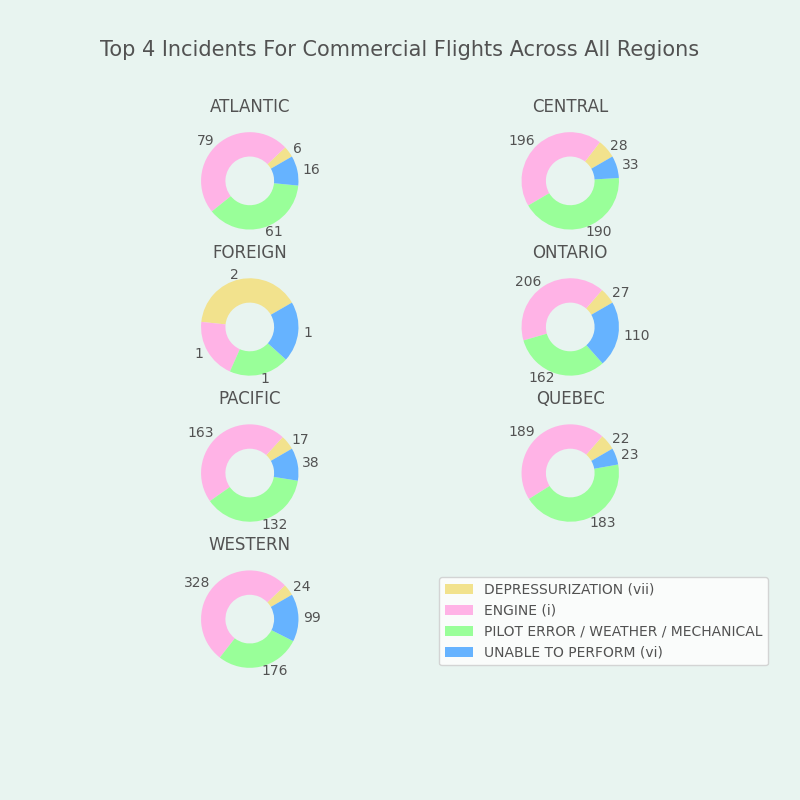

In [8]:
font_color = '#525252'
colors = ['#f2e28d', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']

fig, axes = plt.subplots(4, 2, figsize=(8, 8), facecolor='#e8f4f0')
fig.delaxes(ax= axes[3,1]) 

for i, (idx, row) in enumerate(table.head(7).iterrows()):
    ax = axes[i // 2, i % 2]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, 
           labels=row.values, 
           startangle=30, 
           wedgeprops=dict(width=.5), # For donuts
           colors=colors, 
           textprops={'color':font_color})
    ax.set_title(idx, fontsize=12, color=font_color)
    
    legend = plt.legend([x[1] for x in row.index], 
                        bbox_to_anchor=(2, .9), # Legend position
                        loc='upper left',  
                        ncol=1, 
                        fancybox=True)
    for text in legend.get_texts():
        plt.setp(text, fontsize=10, color=font_color) # Legend font color

fig.subplots_adjust(wspace=.07) # Space between charts

title = fig.suptitle('Top 4 Incidents For Commercial Flights Across All Regions', y=.95, fontsize=15, color=font_color)

# To prevent the title from being cropped
plt.subplots_adjust(top=0.85, bottom=0.15)